In [1]:
import pandas
import psutil as psutil
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz


In [2]:
pd.set_option('max_columns', None)
FILE_NAME = "lawsuit_k_supp2"

df_pydl = pandas.read_csv("save/"+FILE_NAME+"_relab.csv")
df_sklearn = pandas.read_csv("save/"+FILE_NAME+"_relab_sklearn.csv")

In [3]:
df_pydl

,k,depth,random_state,clf.error_,clf.accuracy_,accuracy_train,accuracy_test,sum_misclassified_train,sum_discrimination_additive_pred_abs,sum_discrimination_additive_train_abs,sum_discrimination_additive_train,sum_discrimination_additive_train_pred,discrimination_train,discrimination_train_pred,discrimination_test,duration,min_supp,clf.tree_,discrimination_relab_1,accuracy_relab_1,sum_discri_1,sum_discri_abs_1,discrimination_relab_2,accuracy_relab_2,sum_discri_2,sum_discri_abs_2,discrimination_relab_3,accuracy_relab_3,sum_discri_3,sum_discri_abs_3,discrimination_relab_0.0,accuracy_relab_0.0,sum_discri_0.0,sum_discri_abs_0.0,discrimination_relab_0.1,accuracy_relab_0.1,sum_discri_0.1,sum_discri_abs_0.1,discrimination_relab_0.2,accuracy_relab_0.2,sum_discri_0.2,sum_discri_abs_0.2,discrimination_relab_0.3,accuracy_relab_0.3,sum_discri_0.3,sum_discri_abs_0.3
0,0,1,1,51.000000,0.755981,0.755981,0.730769,51,0.156476,0.325619,0.325619,0.156476,0.325619,0.156476,0.266667,0.034566,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.00000,0.60287,0.000000,0.000000,-0.15648,0.24401,-0.156476,0.156476,-0.15648,0.24401,-0.156476,0.156476,0.00000,0.60287,0.000000,0.000000,0.00000,0.60287,0.000000,0.000000,0.15647,0.75598,0.156476,0.156476,0.15647,0.75598,0.156476,0.156476
1,1,1,1,51.325619,0.754423,0.755981,0.730769,51,0.156476,0.325619,0.325619,0.156476,0.325619,0.156476,0.266667,0.033039,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.1...",0.00000,0.60287,0.000000,0.000000,-0.15648,0.24401,-0.156476,0.156476,-0.15648,0.24401,-0.156476,0.156476,0.00000,0.60287,0.000000,0.000000,0.00000,0.60287,0.000000,0.000000,0.15647,0.75598,0.156476,0.156476,0.15647,0.75598,0.156476,0.156476
2,5,1,1,52.628094,0.748191,0.755981,0.730769,51,0.156476,0.325619,0.325619,0.156476,0.325619,0.156476,0.266667,0.037227,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.7...",0.00000,0.60287,0.000000,0.000000,-0.15648,0.24401,-0.156476,0.156476,-0.15648,0.24401,-0.156476,0.156476,0.00000,0.60287,0.000000,0.000000,0.00000,0.60287,0.000000,0.000000,0.15647,0.75598,0.156476,0.156476,0.15647,0.75598,0.156476,0.156476
3,10,1,1,54.256191,0.740401,0.755981,0.730769,51,0.156476,0.325619,0.325619,0.156476,0.325619,0.156476,0.266667,0.040053,2,"{'feat': 10, 'left': {'value': 1, 'error': 1.5...",0.00000,0.60287,0.000000,0.000000,-0.15648,0.24401,-0.156476,0.156476,-0.15648,0.24401,-0.156476,0.156476,0.00000,0.60287,0.000000,0.000000,0.00000,0.60287,0.000000,0.000000,0.15647,0.75598,0.156476,0.156476,0.15647,0.75598,0.156476,0.156476
4,50,1,1,67.280952,0.678082,0.755981,0.730769,51,0.156476,0.325619,0.325619,0.156476,0.325619,0.156476,0.266667,0.036994,2,"{'feat': 10, 'left': {'value': 1, 'error': 7.8...",0.00000,0.60287,0.000000,0.000000,-0.15648,0.24401,-0.156476,0.156476,-0.15648,0.24401,-0.156476,0.156476,0.00000,0.60287,0.000000,0.000000,0.00000,0.60287,0.000000,0.000000,0.15647,0.75598,0.156476,0.156476,0.15647,0.75598,0.156476,0.156476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,250,7,99,107.093262,0.487592,0.918660,0.826923,17,0.286508,0.360373,0.360373,0.286508,0.360373,0.286508,0.063796,2.511431,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",0.26351,0.90909,0.263520,0.309497,0.17156,0.87081,0.171566,0.401451,0.14697,0.85645,0.146976,0.376861,-0.03194,0.69856,-0.031939,0.372244,0.08620,0.81339,0.086207,0.372056,0.17156,0.87081,0.171566,0.401451,0.28650,0.91866,0.286508,0.286508
3461,500,7,99,197.186523,0.056524,0.918660,0.826923,17,0.286508,0.360373,0.360373,0.286508,0.360373,0.286508,0.063796,2.331966,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",0.26351,0.90909,0.263520,0.309497,0.17156,0.87081,0.171566,0.401451,0.14697,0.85645,0.146976,0.376861,-0.03194,0.69856,-0.031939,0.372244,0.08620,0.81339,0.086207,0.372056,0.17156,0.87081,0.171566,0.401451,0.28650,0.91866,0.286508,0.286508
3462,1000,7,99,377.3730

In [4]:
df_sklearn

,k,depth,random_state,accuracy_train,accuracy_test,discrimination_train,discrimination_train_pred,discrimination_test,sum_discrimination_additive_train,sum_discrimination_additive_train_pred,sum_discrimination_additive_test_pred,sum_discrimination_additive_train_abs,sum_discrimination_additive_train_pred_abs,sum_discrimination_additive_test_pred_abs,min_supp,clf.tree_,accuracy_relab_1,discrimination_relab_1,discrimination_relab_abs_1,discrimination_relab_test_1,discrimination_relab_test_abs_1,accuracy_relab_2,discrimination_relab_2,discrimination_relab_abs_2,discrimination_relab_test_2,discrimination_relab_test_abs_2,accuracy_relab_3,discrimination_relab_3,discrimination_relab_abs_3,discrimination_relab_test_3,discrimination_relab_test_abs_3,accuracy_relab_0.0,discrimination_relab_0.0,discrimination_relab_abs_0.0,discrimination_relab_test_0.0,discrimination_relab_test_abs_0.0,accuracy_relab_0.1,discrimination_relab_0.1,discrimination_relab_abs_0.1,discrimination_relab_test_0.1,discrimination_relab_test_abs_0.1,accuracy_relab_0.2,discrimination_relab_0.2,discrimination_relab_abs_0.2,discrimination_relab_test_0.2,discrimination_relab_test_abs_0.2,accuracy_relab_0.3,discrimination_relab_0.3,discrimination_relab_abs_0.3,discrimination_relab_test_0.3,discrimination_relab_test_abs_0.3
0,0,1,1,0.755981,0.730769,0.325619,0.156476,0.266667,0.325619,0.156476,0.266667,0.325619,0.156476,0.266667,2,<sklearn.tree._tree.Tree object at 0x7efee9772...,0.6028,0.000000,0.000000,0.000000,0.000000,0.2440,-0.156476,0.156476,-0.266667,0.266667,0.2440,-0.156476,0.156476,-0.266667,0.266667,0.6028,0.000000,0.000000,0.000000,0.000000,0.6028,0.000000,0.000000,0.000000,0.000000,0.7559,0.156476,0.156476,0.266667,0.266667,0.7559,0.156476,0.156476,0.266667,0.266667
1,0,2,1,0.851675,0.884615,0.325619,0.230571,0.169697,0.325619,0.230571,0.169697,0.325619,0.230571,0.363636,2,<sklearn.tree._tree.Tree object at 0x7efee9772...,0.6985,0.074095,0.074095,-0.096970,0.096970,0.6028,0.000000,0.000000,0.000000,0.000000,0.1483,-0.230571,0.230571,-0.169697,0.169697,0.1483,-0.230571,0.230571,-0.169697,0.169697,0.6985,0.074095,0.074095,-0.096970,0.096970,0.6985,0.074095,0.074095,-0.096970,0.096970,0.8516,0.230571,0.230571,0.169697,0.363636
2,0,3,1,0.880383,0.846154,0.325619,0.312952,0.375758,0.325619,0.312952,0.375758,0.325619,0.312952,0.375758,2,<sklearn.tree._tree.Tree object at 0x7efee9772...,0.8516,0.230571,0.395333,0.169697,0.581818,0.7272,0.074095,0.238857,0.060606,0.472727,0.5741,-0.082381,0.082381,-0.206061,0.206061,0.5741,-0.082381,0.082381,-0.206061,0.206061,0.7272,0.074095,0.238857,0.060606,0.472727,0.7272,0.074095,0.238857,0.060606,0.472727,0.8516,0.230571,0.395333,0.169697,0.581818
3,0,4,1,0.880383,0.826923,0.325619,0.284857,0.354545,0.325619,0.284857,0.354545,0.341238,0.284857,0.354545,2,<sklearn.tree._tree.Tree object at 0x7efee9772...,0.8708,0.238000,0.331714,0.148485,0.560606,0.8516,0.202476,0.367238,0.148485,0.560606,0.6937,0.000857,0.568857,-0.251515,0.960606,0.5693,-0.127524,0.440476,-0.339394,0.872727,0.6937,0.000857,0.568857,-0.251515,0.960606,0.6937,0.000857,0.568857,-0.251515,0.960606,0.8803,0.284857,0.284857,0.354545,0.354545
4,0,5,1,0.909091,0.884615,0.325619,0.270000,0.248485,0.325619,0.270000,0.248485,0.388857,0.363714,0.569697,2,<sklearn.tree._tree.Tree object at 0x7efee9772...,0.9043,0.246000,0.339714,0.227273,0.548485,0.8803,0.202476,0.383238,0.227273,0.548485,0.8755,0.194476,0.375238,0.227273,0.548485,0.6363,-0.100190,0.413143,-0.293939,0.893939,0.7751,0.044000,0.525714,-0.160606,0.936364,0.8755,0.194476,0.375238,0.227273,0.548485,0.9090,0.270000,0.363714,0.248485,0.569697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,3,99,0.870813,0.884615,0.360373,0.345770,0.221691,0.360373,0.345770,0.221691,0.373752,0.345770,0.221691,2,<sklearn.tree._tree.Tree object at 0x7efee90f7...,0.7272,

In [5]:
_COLORS4 = ['#ff0000', '#00ff00', '#0000ff', '#87cefa']
_COLORS5 = ['#008080', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
_COLORS7 = ['#2e8b57', '#ff0000', '#ffd700', '#c71585', '#00ff00', '#0000ff', '#1e90ff']
_COLORS10 = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
_COLORS11 = ['#8b4513', '#006400', '#4682b4', '#4b0082', '#ff0000', '#00ff7f', '#00ffff', '#0000ff', '#ffff54',
             '#ff1493', '#ffe4c4']

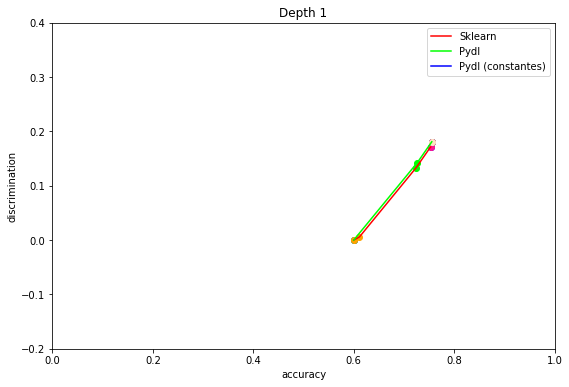

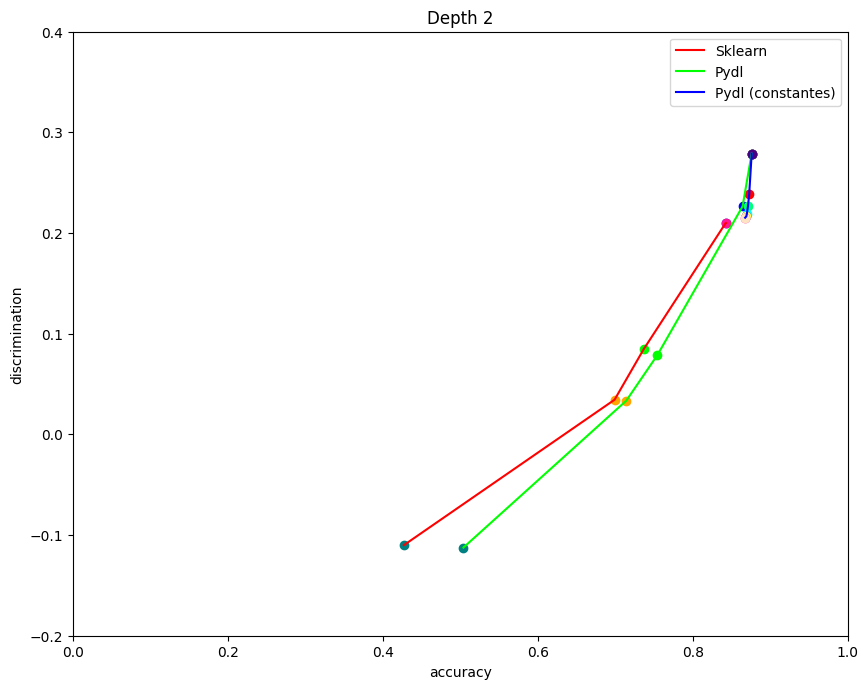

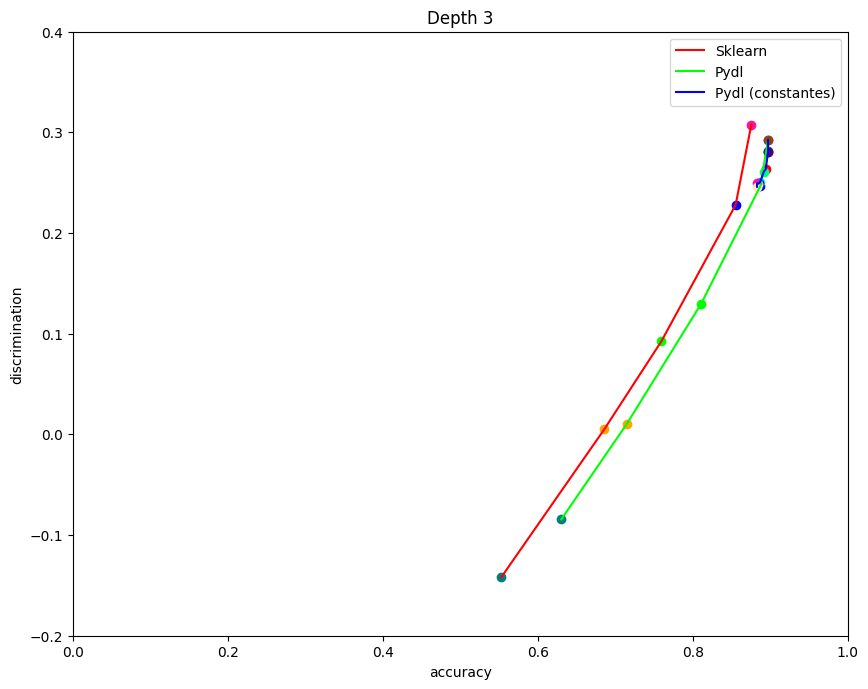

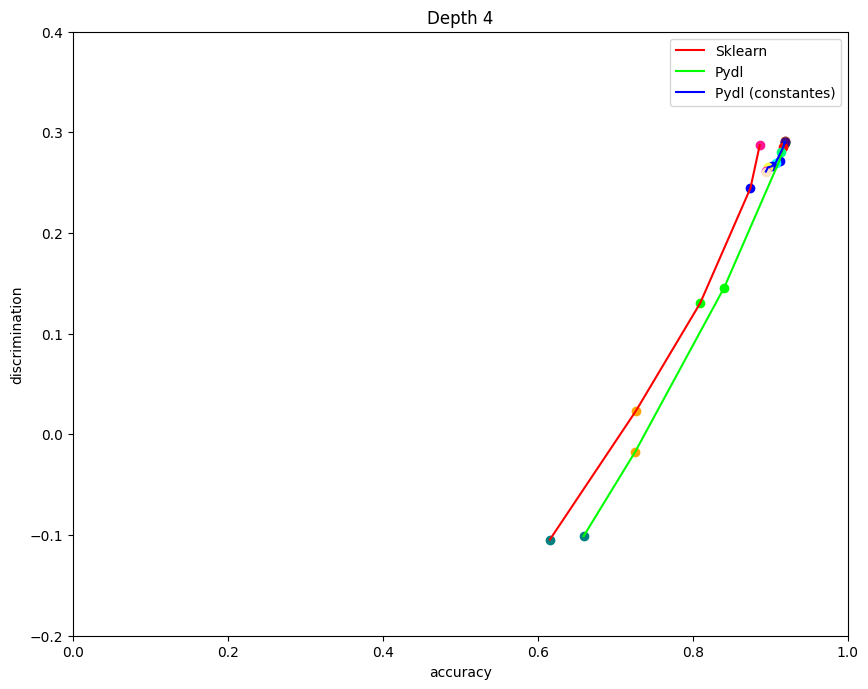

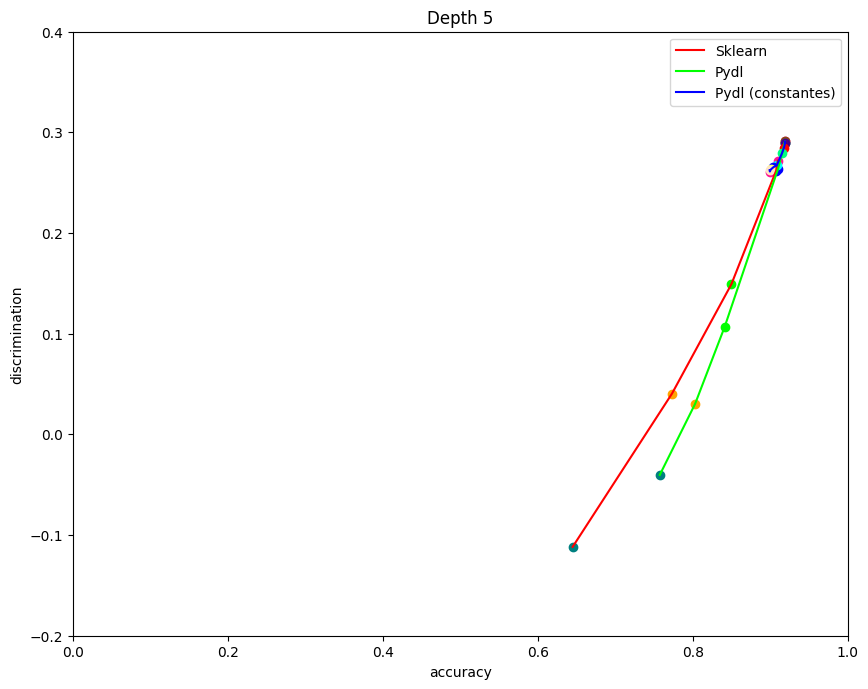

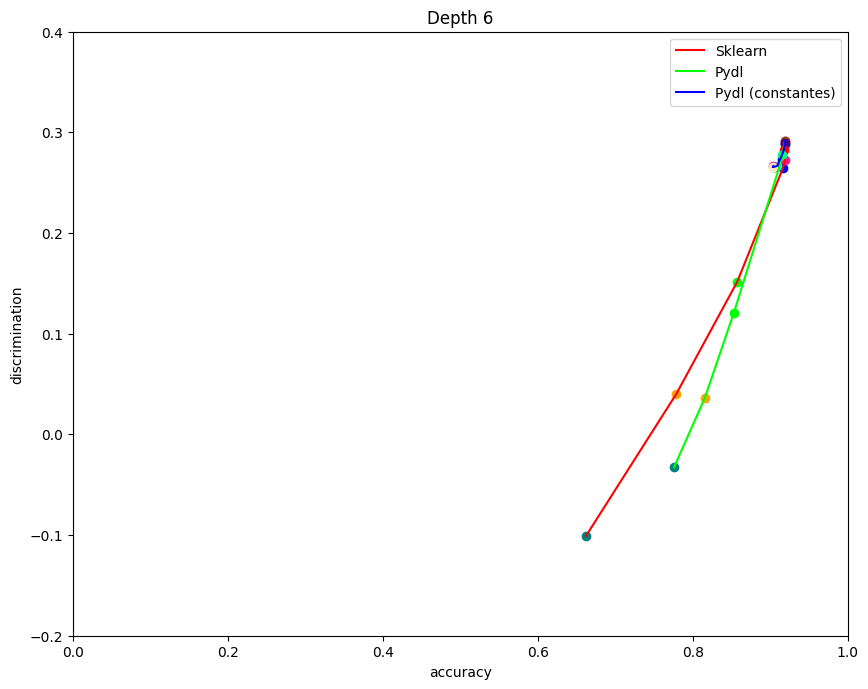

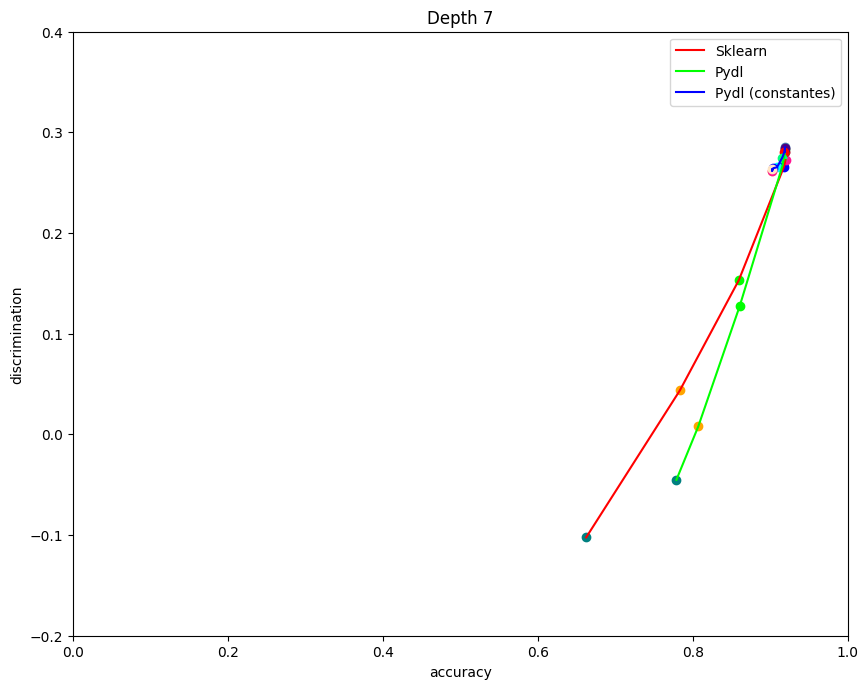

In [6]:
colors11 = _COLORS11.copy()
colors5 = _COLORS5.copy()
colors4 = _COLORS4.copy()
legends = ['relab discrim < 0', 'relab discrim < 0.1', 'relab discrim < 0.2', 'relab discrim < 0.3', 'no relab']
fig, axes = plt.subplots()
for depth in df_sklearn['depth'].unique():
    index_legends = 0
    y_values = list()
    x_values = list()
    y_values_pydl = list()
    x_values_pydl = list()
    for x_axe, y_axe in [('accuracy_relab_0.0', 'discrimination_relab_0.0'), ('accuracy_relab_0.1', 'discrimination_relab_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_0.3'), ('accuracy_train', 'discrimination_train_pred')]:

        tmp = df_sklearn.loc[(df_sklearn["k"] == 0) & (df_sklearn["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors5[index_legends])

        tmp = df_pydl.loc[(df_pydl["k"] == 0) & (df_pydl["depth"] == depth)]
        x_values_pydl.append(tmp[x_axe].mean())
        y_values_pydl.append(tmp[y_axe].mean())

        plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors5[index_legends])


        index_legends +=1
    plt.plot(x_values, y_values, label="Sklearn", c=colors4[0])
    plt.plot(x_values_pydl, y_values_pydl, label="Pydl", c=colors4[1])

    y_values = list()
    x_values = list()
    x_axe = "accuracy_train"
    y_axe = "discrimination_train_pred"
    index_legends = 0
    for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:

        tmp = df_pydl.loc[(df_pydl["k"] == k) & (df_pydl["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors11[index_legends])
        index_legends +=1

    plt.plot(x_values, y_values, label="Pydl (constantes)", c=colors4[2])


    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    plt.ylim(-0.2, 0.4)
    plt.xlim(0, 1)
    plt.legend()

    plt.show()